## Regularization - ML Algo

Regularization is a technique used in machine learning and statistical modeling to prevent overfitting and improve the generalization performance of models. It involves adding a penalty term to the objective function of the model, which discourages overly complex models by imposing constraints on the model parameters. Regularization techniques are commonly used in algorithms like linear regression, logistic regression, and neural networks. Here's an overview of some common regularization techniques:

1. **L1 Regularization (Lasso Regression):**
   - L1 regularization adds the absolute value of the magnitude of coefficients as a penalty term to the loss function.
   - It encourages sparsity in the model by driving some coefficients to exactly zero, effectively performing feature selection.
   - Lasso regression can be useful when the dataset has many features and only a subset of them are relevant.
   - It is defined as:
     $ \text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} |\beta_i| $
     where $( \lambda)$ is the regularization parameter.
     

2. **L2 Regularization (Ridge Regression):**
   - L2 regularization adds the sum of squares of the magnitude of coefficients as a penalty term to the loss function.
   - It discourages large coefficients and effectively shrinks them towards zero without making them exactly zero.
   - Ridge regression can help mitigate multicollinearity issues in datasets where predictors are highly correlated.
   - It is defined as:
     $\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} \beta_i^2 $
     where $( \lambda)$ is the regularization parameter.
     

3. **Elastic Net Regularization:**
   - Elastic Net regularization combines both L1 and L2 regularization penalties.
   - It balances between L1 and L2 regularization by including both absolute and square magnitude of coefficients in the penalty term.
   - Elastic Net can be more robust when there are correlated predictors in the dataset.
   - It is defined as:
     $ \text{Loss} = \text{MSE} + \lambda_1 \sum_{i=1}^{n} |\beta_i| + \lambda_2 \sum_{i=1}^{n} \beta_i^2 \ $
     where $( \lambda_1 )$ and $( \lambda_2)$ are regularization parameters.

4. **Dropout (Neural Networks):**
   - Dropout is a regularization technique specific to neural networks.
   - It randomly drops a proportion of neurons during training, forcing the network to learn redundant representations.
   - Dropout helps prevent overfitting by introducing noise and promoting robustness in neural network models.

Regularization techniques are essential tools for building models that generalize well to unseen data. By controlling the complexity of the model, regularization helps strike a balance between bias and variance, leading to better performance on real-world datasets.

While the overarching goal of regularization techniques remains consistent across study materials, the mathematical formulations and intuitions may vary depending on the context and the level of detail covered. Here's how the mathematical intuition might differ across study materials:

1. **Mathematical Formulations:**
   - Different textbooks, research papers, or online resources may present regularization techniques with slight variations in notation and mathematical formulations.
   - Some materials might delve deeply into the derivation of the regularization terms and their integration into the loss function, while others might focus more on the practical implementation and application aspects.

2. **Intuition Behind Regularization:**
   - The intuition behind regularization—preventing overfitting by penalizing overly complex models—remains consistent across materials.
   - However, the emphasis on specific aspects of regularization, such as bias-variance tradeoff, model complexity, and the effect of regularization parameters, may vary.
   - Some materials might provide more intuitive explanations, while others might focus on the mathematical rigor.

3. **Examples and Illustrations:**
   - Study materials may use different examples and illustrations to demonstrate the impact of regularization on model performance.
   - The choice of datasets, visualizations, and case studies can influence the understanding of regularization techniques.

4. **Implementation Details:**
   - Materials that focus on practical implementation often provide code examples, step-by-step guides, and discussions on hyperparameter tuning for regularization techniques.
   - The level of detail regarding the implementation nuances, such as optimization algorithms, cross-validation strategies, and regularization strength selection, may vary.

5. **Theoretical vs. Applied Perspectives:**
   - Some study materials might approach regularization techniques from a theoretical perspective, emphasizing mathematical proofs and statistical principles.
   - Others might take a more applied approach, focusing on real-world datasets, machine learning frameworks, and best practices in model development.

In summary, while the fundamental concepts of regularization remain consistent, the mathematical intuition and depth of coverage may vary across study materials. It's beneficial to explore multiple resources and perspectives to gain a comprehensive understanding of regularization techniques in machine learning and statistical modeling.

# Ridge Regression

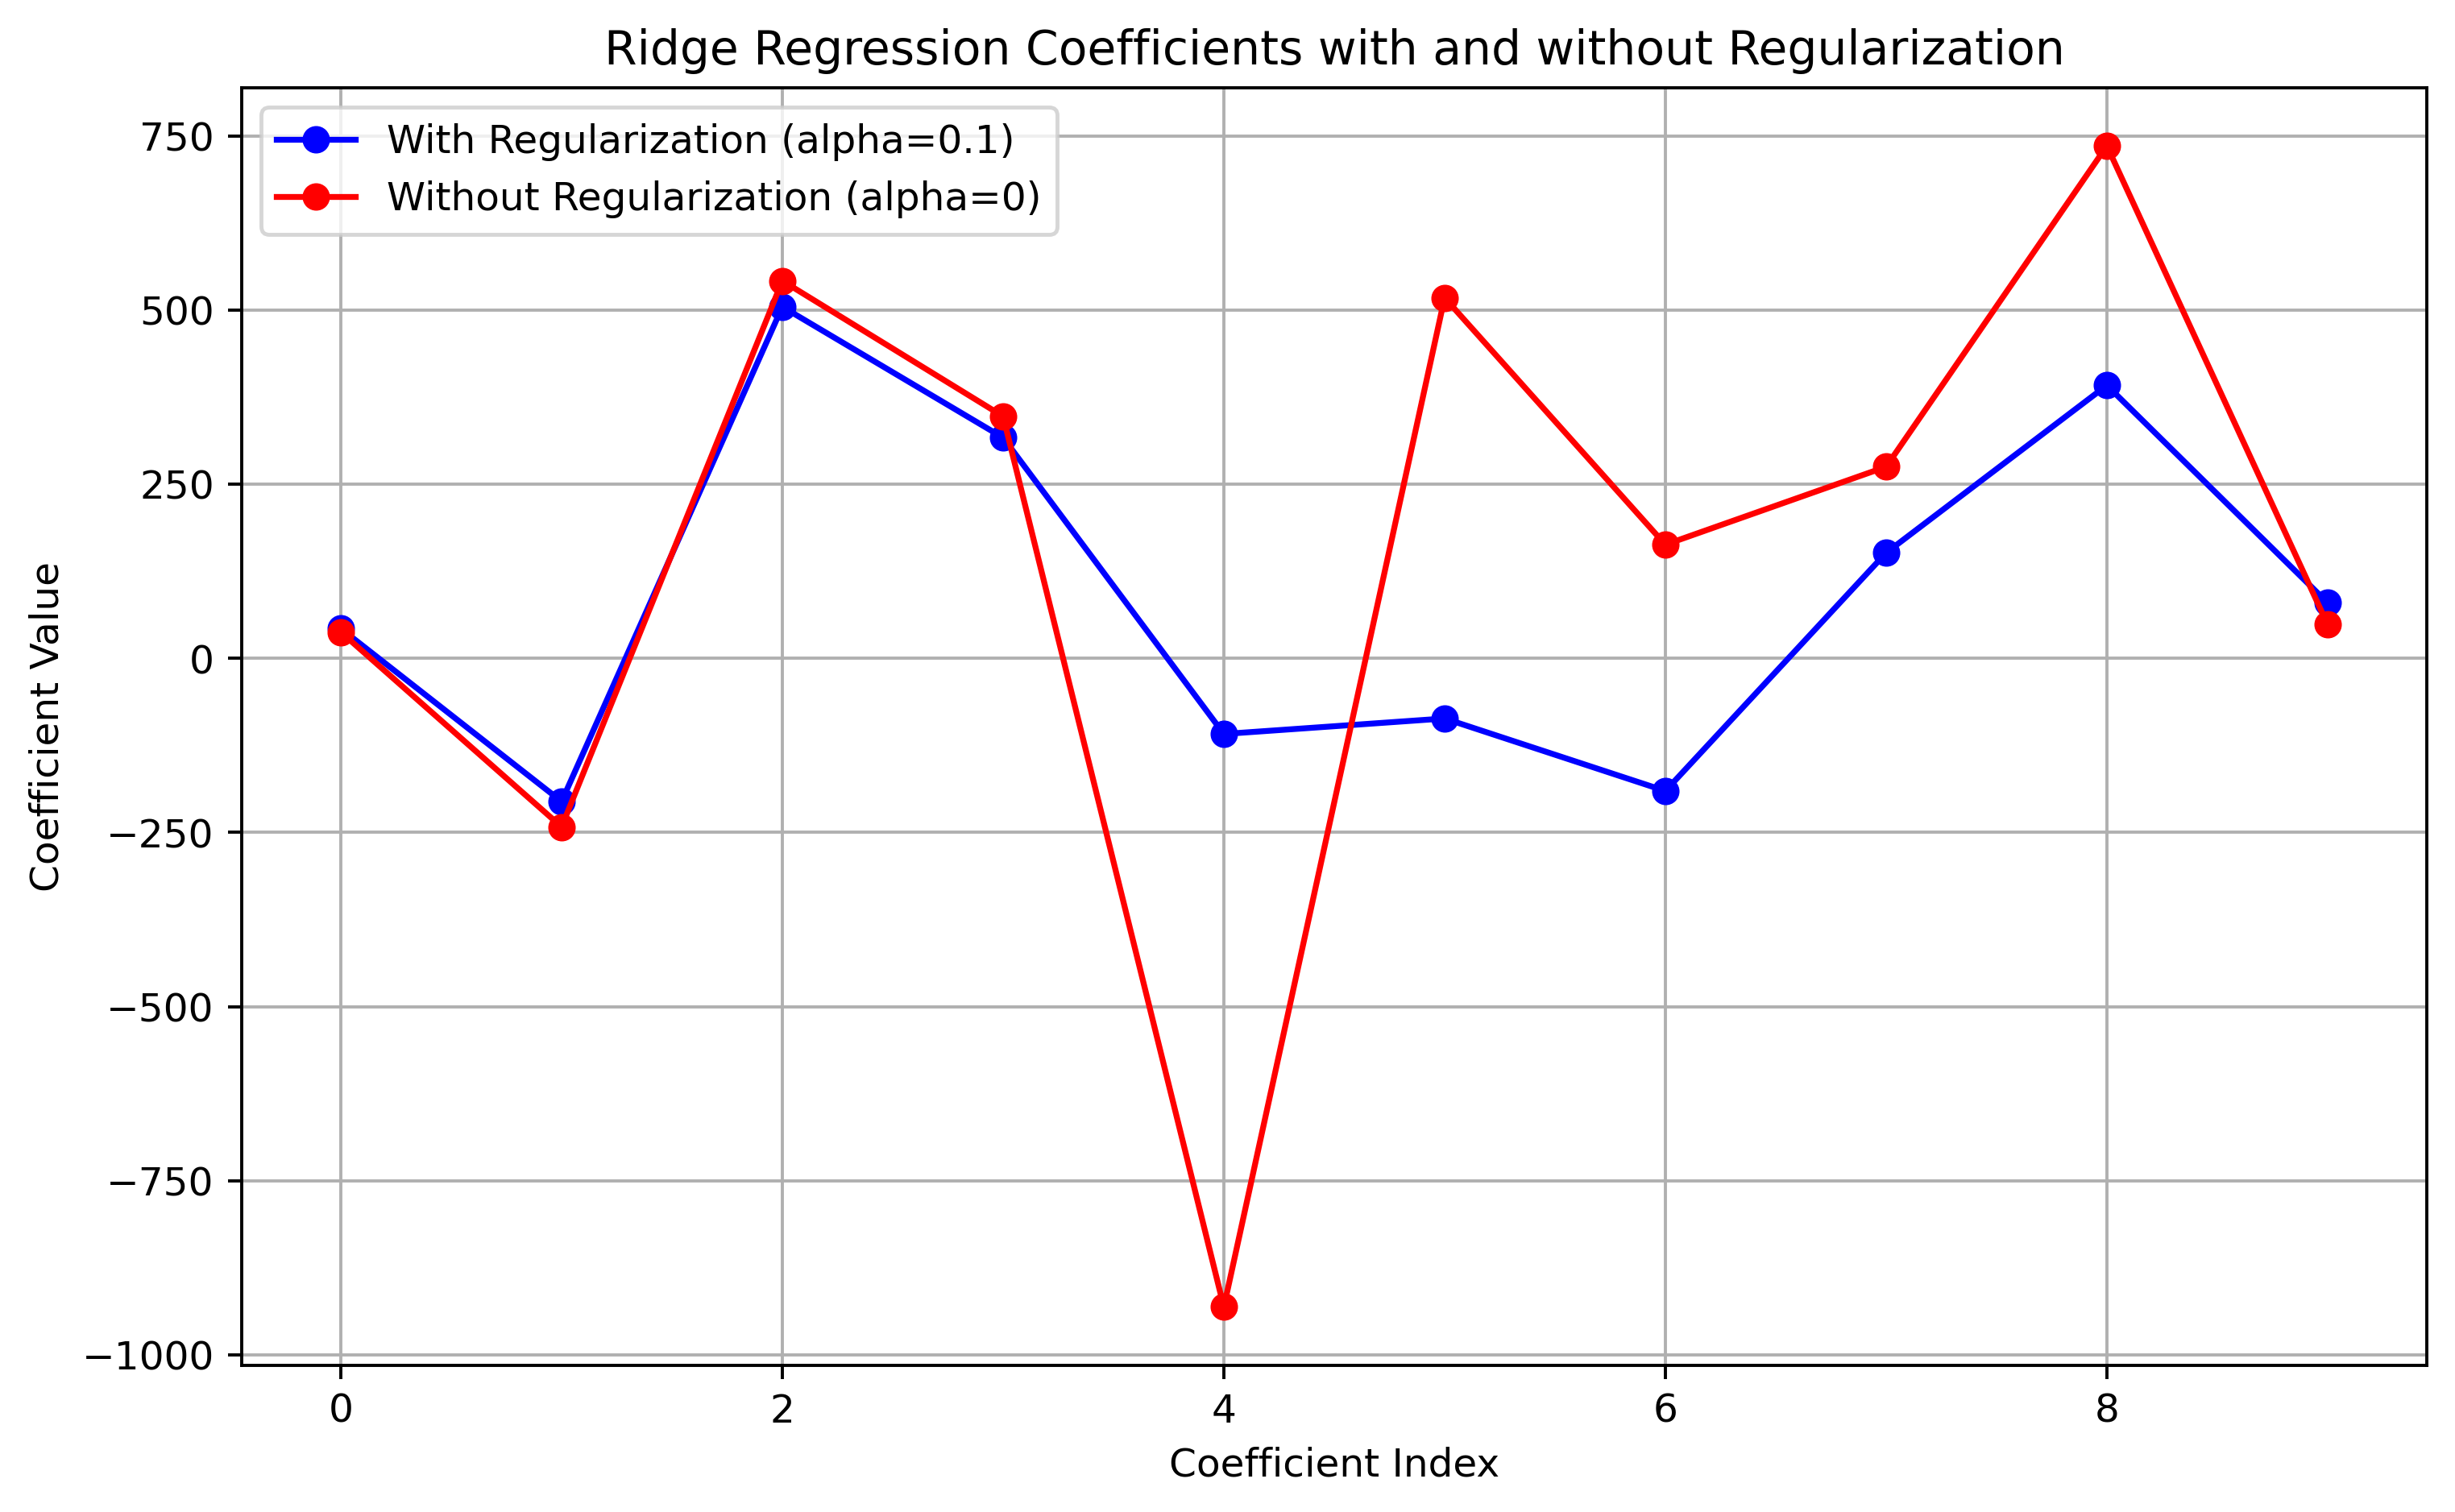

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression models with and without regularization
alpha = 0.1  # Regularization strength
ridge_model_regularized = Ridge(alpha=alpha)
ridge_model_regularized.fit(X_train, y_train)

ridge_model_non_regularized = Ridge(alpha=0)  # No regularization
ridge_model_non_regularized.fit(X_train, y_train)

# Get the coefficients from both models
coef_regularized = ridge_model_regularized.coef_
coef_non_regularized = ridge_model_non_regularized.coef_

# Plotting the coefficients
plt.figure(figsize=(10, 6), dpi=350)
plt.plot(coef_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients with and without Regularization')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\inare\Anaconda3\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\inare\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\inare\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

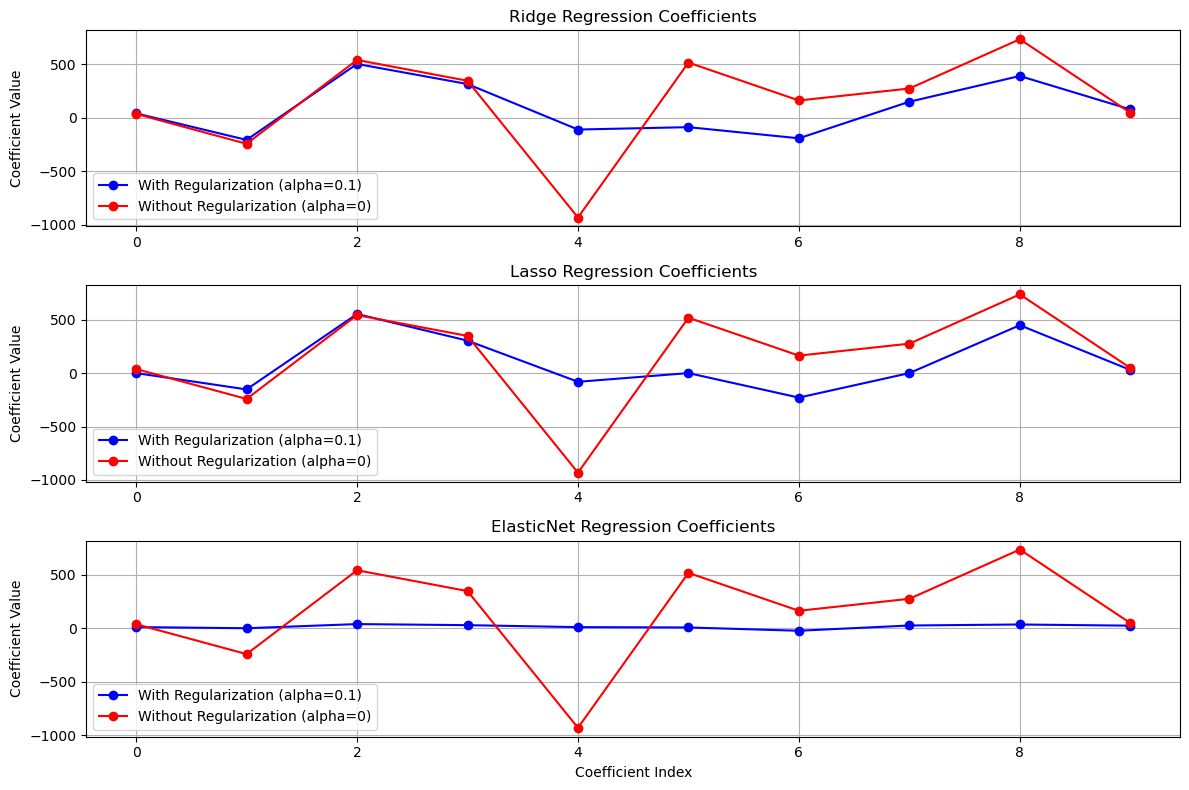

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Load the Diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge, Lasso, and ElasticNet models with and without regularization
alpha = 0.1  # Regularization strength
ridge_model_regularized = Ridge(alpha=alpha)
ridge_model_regularized.fit(X_train, y_train)

ridge_model_non_regularized = Ridge(alpha=0)  # No regularization
ridge_model_non_regularized.fit(X_train, y_train)

lasso_model_regularized = Lasso(alpha=alpha)
lasso_model_regularized.fit(X_train, y_train)

lasso_model_non_regularized = Lasso(alpha=0)
lasso_model_non_regularized.fit(X_train, y_train)

elasticnet_model_regularized = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio = 0.5 for balanced ElasticNet
elasticnet_model_regularized.fit(X_train, y_train)

elasticnet_model_non_regularized = ElasticNet(alpha=0, l1_ratio=0.5)
elasticnet_model_non_regularized.fit(X_train, y_train)

# Get the coefficients from all models
coef_ridge_regularized = ridge_model_regularized.coef_
coef_ridge_non_regularized = ridge_model_non_regularized.coef_

coef_lasso_regularized = lasso_model_regularized.coef_
coef_lasso_non_regularized = lasso_model_non_regularized.coef_

coef_elasticnet_regularized = elasticnet_model_regularized.coef_
coef_elasticnet_non_regularized = elasticnet_model_non_regularized.coef_

# Set DPI for the plot
plt.figure(figsize=(12, 8), dpi=100)

# Plot Ridge Regression coefficients
plt.subplot(3, 1, 1)
plt.plot(coef_ridge_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_ridge_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# Plot Lasso Regression coefficients
plt.subplot(3, 1, 2)
plt.plot(coef_lasso_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_lasso_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('Lasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

# Plot ElasticNet Regression coefficients
plt.subplot(3, 1, 3)
plt.plot(coef_elasticnet_regularized, color='blue', linestyle='-', marker='o', label='With Regularization (alpha=0.1)')
plt.plot(coef_elasticnet_non_regularized, color='red', linestyle='-', marker='o', label='Without Regularization (alpha=0)')
plt.title('ElasticNet Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model with regularization strength (alpha)
alpha = 0.1
ridge_model = Ridge(alpha=alpha)

# Fit the model to your data
ridge_model.fit(X_train, y_train)

# The regularization term for Ridge Regression is calculated as the sum of squared coefficients multiplied by alpha
regularization_term_ridge = alpha * np.sum(ridge_model.coef_ ** 2)


In [7]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model with regularization strength (alpha)
alpha = 0.1
lasso_model = Lasso(alpha=alpha)

# Fit the model to your data
lasso_model.fit(X_train, y_train)

# The regularization term for Lasso Regression is calculated as the sum of absolute coefficients multiplied by alpha
regularization_term_lasso = alpha * np.sum(np.abs(lasso_model.coef_))


In [8]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet Regression model with regularization strengths (alpha and l1_ratio)
alpha = 0.1
l1_ratio = 0.5  # l1_ratio = 0.5 for balanced ElasticNet
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model to your data
elasticnet_model.fit(X_train, y_train)

# The regularization term for ElasticNet Regression is a combination of L1 and L2 regularization terms
regularization_term_elasticnet = alpha * ((1 - l1_ratio) * np.sum(elasticnet_model.coef_ ** 2) +
                                         l1_ratio * np.sum(np.abs(elasticnet_model.coef_)))


## Overfitting examples and reasoning 

Overfitting occurs when a machine learning model learns to capture the noise and random fluctuations in the training data, rather than the underlying patterns or relationships. As a result, the model performs well on the training data but fails to generalize to unseen data. This happens because the model has essentially memorized the training data, including its noise and outliers, instead of learning the underlying patterns that are present across different datasets.


Explanation of the code:

1. We generate synthetic data with noise where the relationship between X and y is linear.
2. We split the data into training and testing sets.
3. We define a function `plot_model` to visualize the training and testing data along with the model's predictions.
4. We iterate over different degrees of polynomial features (1, 4, and 15) to fit polynomial regression models to the data.
5. For each degree, we create a polynomial regression model pipeline consisting of polynomial features and linear regression.
6. We fit the model to the training data and plot the model's predictions.
7. We calculate the Mean Squared Error (MSE) on the testing data to quantify the model's performance.

The visualizations and MSE values demonstrate how overfitting occurs as the degree of the polynomial increases. A high-degree polynomial model captures the noise and fluctuations in the training data, resulting in poor generalization to unseen data (testing data). This is evident from the increasing discrepancy between the training and testing data and the increasing MSE as the degree of the polynomial increases, indicating overfitting.

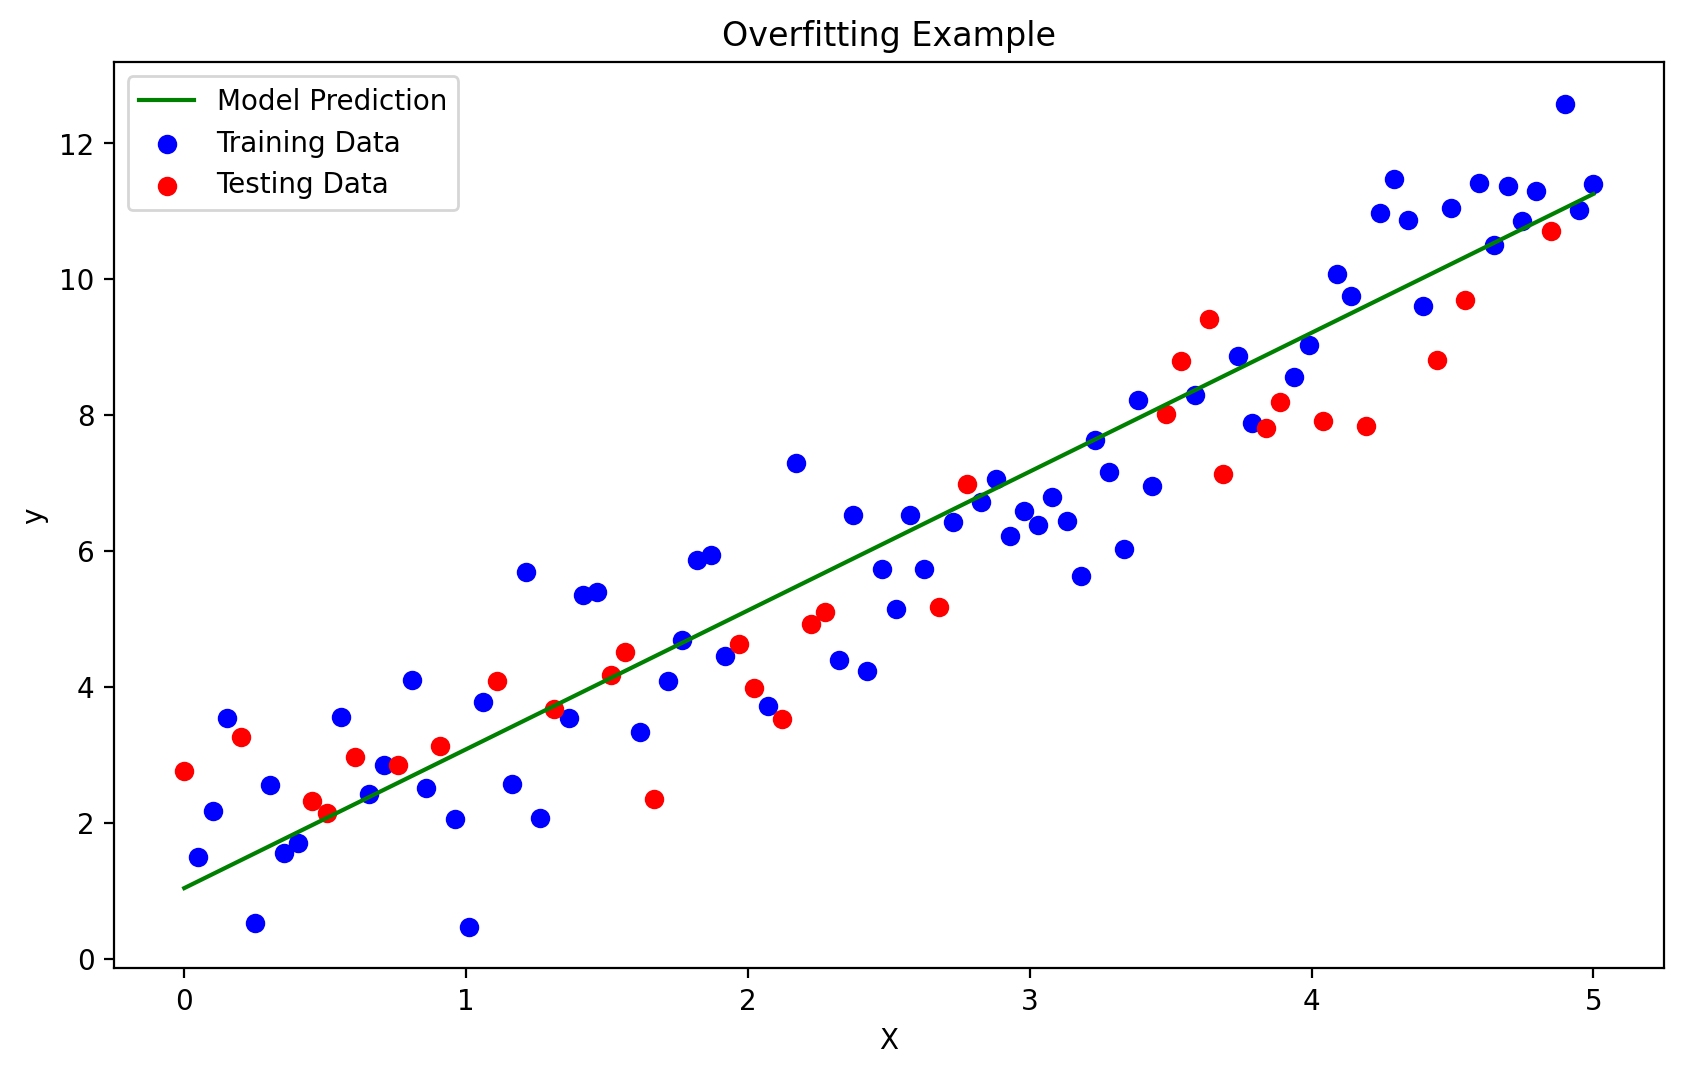

Degree 1 MSE: 1.0598009660146486


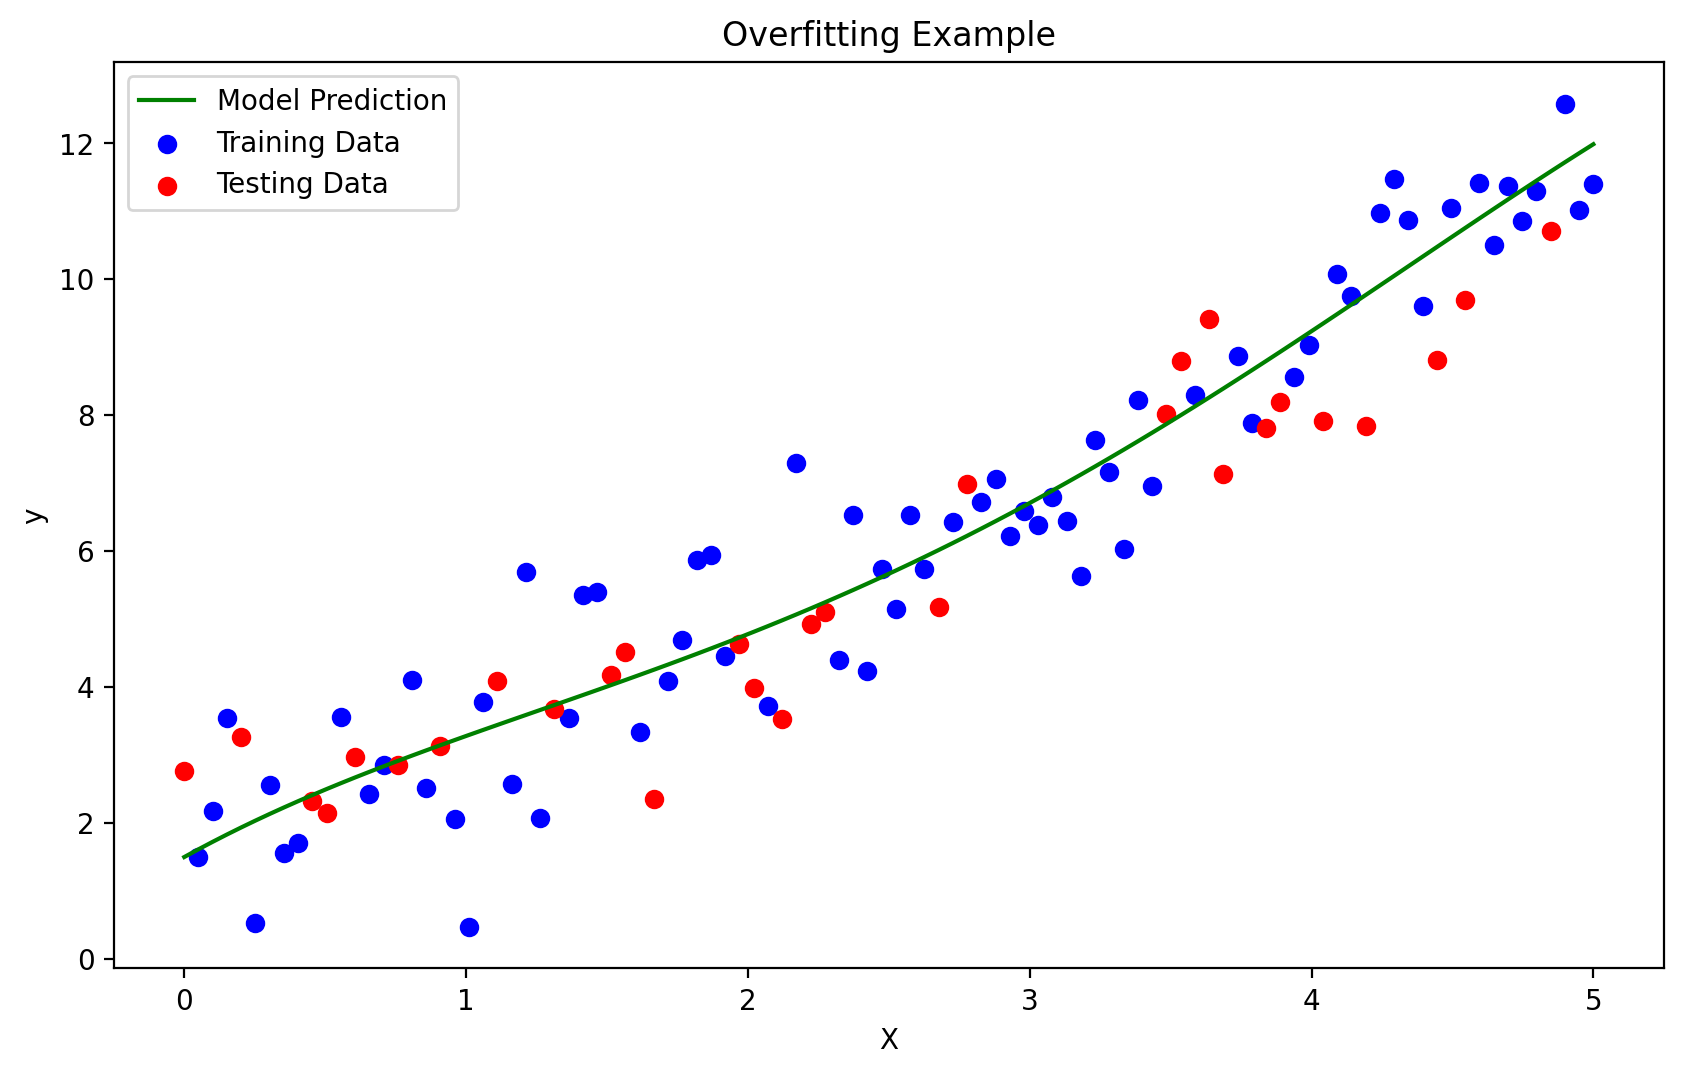

Degree 4 MSE: 0.914489323996094


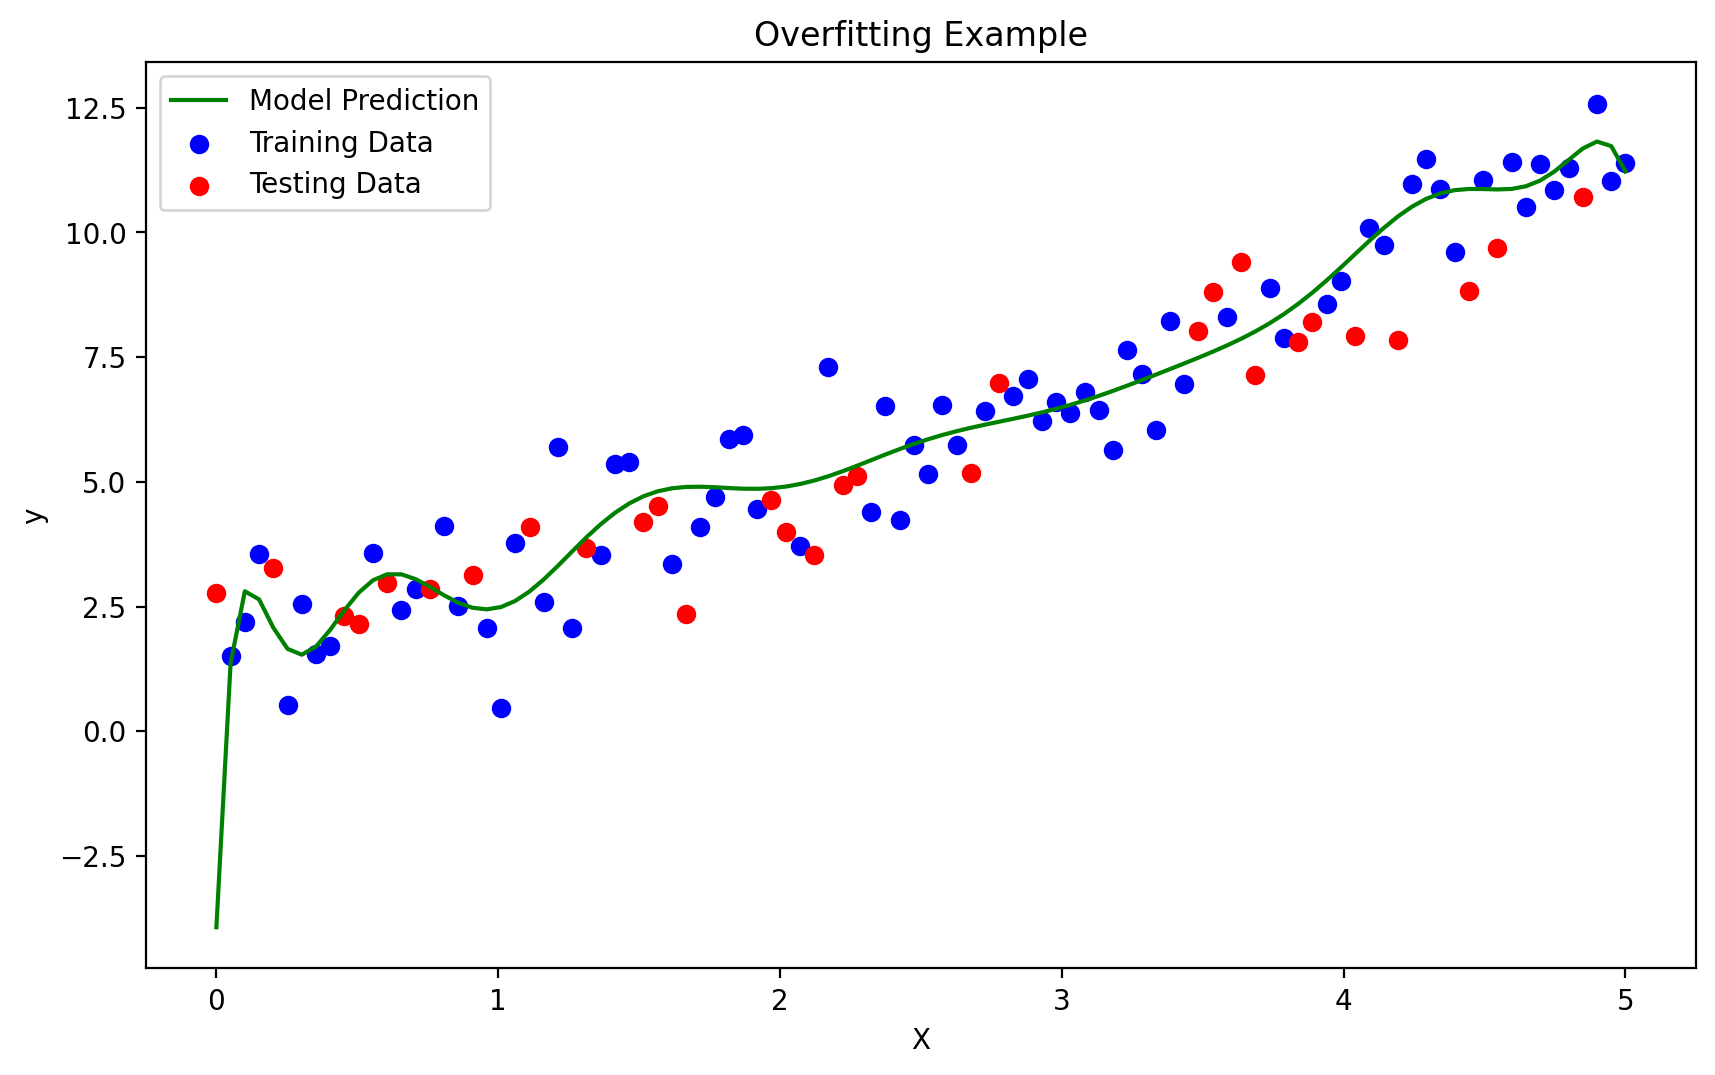

Degree 15 MSE: 2.716564127042863


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with noise
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot the data and the model's predictions
def plot_model(X, y, X_train, y_train, X_test, y_test, model):
    plt.figure(figsize=(10, 6), dpi=200)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Testing Data')
    plt.plot(X, model.predict(X[:, np.newaxis]), color='green', label='Model Prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Overfitting Example')
    plt.legend()
    plt.show()

# Degree of polynomial features for the model
degrees = [1, 4, 15]  # Trying different degrees to demonstrate overfitting

for degree in degrees:
    # Create a polynomial regression model pipeline
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Fit the model to the training data
    model.fit(X_train[:, np.newaxis], y_train)
    
    # Plot the model's predictions
    plot_model(X, y, X_train, y_train, X_test, y_test, model)
    
    # Calculate Mean Squared Error (MSE) on the testing data
    mse = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
    print(f"Degree {degree} MSE: {mse}")


Regularization techniques like L1 (Lasso), L2 (Ridge), and ElasticNet are used in machine learning to prevent overfitting and improve the generalization of models. Here's when to consider using regularization:

1. **High Dimensionality**:
   - When dealing with datasets with a large number of features, regularization helps prevent overfitting by penalizing large coefficients and encouraging sparsity in the model.

2. **Multicollinearity**:
   - Regularization techniques are effective when dealing with multicollinearity, where independent variables are highly correlated. Regularization helps stabilize the coefficients and makes them more interpretable.

3. **Preventing Overfitting**:
   - Regularization is particularly useful when models are overfitting, capturing noise and fluctuations in the training data. By penalizing large coefficients, regularization techniques promote simpler models that generalize better to unseen data.



In this example:
- We generate synthetic data using `make_regression`.
- We split the data into training and testing sets.
- We train Ridge Regression models with different alpha values (0, 0.1, 1, 10, 100), representing different levels of regularization strength.
- We plot the model's predictions on the test data for each alpha value and visualize how the model changes with different regularization strengths.
- We calculate and print the Mean Squared Error (MSE) for each model, providing a measure of its performance on the test data.

This example demonstrates visually how regularization affects the Ridge Regression model's predictions and how different levels of regularization strength impact model performance. Adjusting the regularization strength allows us to control model complexity and prevent overfitting.

Alpha: 0, MSE: 103.47302683438758
Alpha: 0.1, MSE: 103.55273031545674
Alpha: 1, MSE: 104.73923652620921
Alpha: 10, MSE: 149.69446082496492
Alpha: 100, MSE: 839.4126031963353


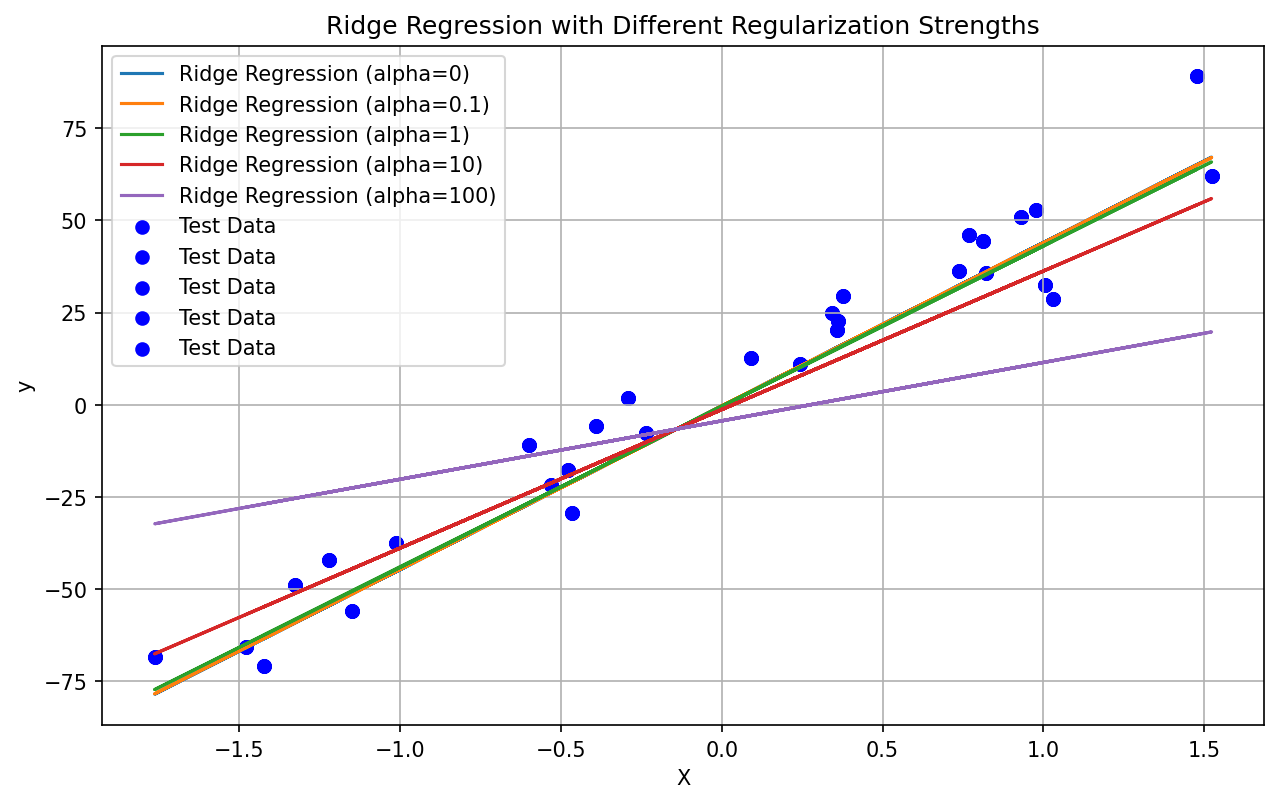

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Ridge Regression models with different alpha values (regularization strength)
alphas = [0, 0.1, 1, 10, 100]  # Different regularization strengths
coefficients = []

plt.figure(figsize=(10, 6), dpi=150)

# Fit and visualize Ridge Regression models
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    
    # Plot the model's predictions
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.plot(X_test, y_pred, label=f'Ridge Regression (alpha={alpha})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Ridge Regression with Different Regularization Strengths')
    plt.legend()

    # Calculate and print the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}, MSE: {mse}")

plt.grid(True)
plt.show()


In addition to the basics of regularization techniques like L1 (Lasso), L2 (Ridge), and ElasticNet, there are several important concepts and considerations to be aware of:

1. **Choice of Regularization Strength (Hyperparameter Tuning)**:
   - The choice of the regularization strength parameter (alpha or lambda) is crucial. It determines how much emphasis is placed on regularization versus fitting the training data. 
   - The regularization strength is often tuned using techniques like cross-validation or grid search to find the optimal value that minimizes the model's error on unseen data.

2. **Feature Scaling**:
   - Regularization techniques can be sensitive to the scale of features. It's often recommended to scale the features to a similar range (e.g., using standardization or normalization) before applying regularization.
   - Feature scaling ensures that each feature contributes proportionately to the regularization penalty.

3. **Interpretability**:
   - Regularization techniques like L1 (Lasso) can drive some coefficients to exactly zero, effectively performing feature selection. This can make the model more interpretable by identifying the most important features.
   - On the other hand, L2 (Ridge) regularization tends to shrink coefficients towards zero without eliminating them entirely, which can lead to a less sparse model.

4. **ElasticNet**:
   - ElasticNet combines both L1 and L2 regularization penalties. It offers a balance between the feature selection capabilities of Lasso and the stability of Ridge regression.
   - ElasticNet introduces an additional hyperparameter, the mixing parameter (l1_ratio), which controls the balance between L1 and L2 penalties.

5. **Computational Complexity**:
   - The computational complexity of regularization techniques can vary depending on the optimization algorithm used and the size of the dataset.
   - While Lasso regularization can lead to sparse solutions, it involves solving an optimization problem with an L1 penalty, which can be computationally more expensive compared to Ridge regularization.

6. **Generalization Performance**:
   - Regularization techniques help improve the generalization performance of machine learning models by reducing overfitting. However, it's essential to strike a balance between bias and variance.
   - Strong regularization may lead to underfitting, where the model is too simple to capture the underlying patterns in the data.

7. **Other Regularization Techniques**:
   - Besides L1, L2, and ElasticNet regularization, there are other regularization techniques such as dropout regularization in neural networks, early stopping, and data augmentation, each designed to prevent overfitting in specific contexts.

Understanding these additional aspects of regularization techniques can help you effectively apply them to improve the robustness and generalization performance of your machine learning models.

# Performance Metrics

Performance metrics such as Precision, Recall, F1 Score, ROC (Receiver Operating Characteristic) curve, and AUC (Area Under the Curve) are crucial tools in evaluating the effectiveness of classification models. Here's an overview of each metric:

1. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   - It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP):
     $ \text{Precision} = \frac{TP}{TP + FP} $
   - Precision is particularly useful when the cost of false positives is high, and we want to minimize the number of false positive predictions.
   

2. **Recall (Sensitivity)**:
   - Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
   - It is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
     $ \text{Recall} = \frac{TP}{TP + FN} $
   - Recall is crucial when the cost of false negatives is high, and we want to minimize the number of false negative predictions.


3. **F1 Score**:
   - F1 Score is the harmonic mean of Precision and Recall.
   - It provides a single score that balances Precision and Recall.
   - F1 Score is calculated as:
    $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
   - F1 Score reaches its best value at 1 (perfect precision and recall) and worst at 0.


4. **ROC Curve (Receiver Operating Characteristic Curve)**:
   - The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds.
   - TPR is the same as Recall, and FPR is calculated as the ratio of false positives (FP) to the sum of false positives and true negatives (TN).
   - The ROC curve plots TPR against FPR at various threshold settings.
   - AUC measures the area under the ROC curve, which indicates the model's ability to distinguish between positive and negative classes.
   - AUC ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates a perfect classifier.


These performance metrics provide valuable insights into the performance of classification models and help in evaluating and comparing different models. Depending on the specific requirements of the problem and the associated costs of false positives and false negatives, different metrics may be prioritized. It's essential to consider these metrics comprehensively to make informed decisions about model selection and optimization.

Explaining precision and recall to a small kid can be done using a simple analogy involving a game of treasure hunting:

1. **Precision**:
   - Precision is like hitting the treasure when you're told there's treasure hidden in a certain area.
   - Imagine you're playing a treasure hunt game with your friends. You're digging in a specific area because you were told the treasure might be there.
   - Precision tells us how many times you dug and found real treasure, compared to how many times you dug and found something else (like a rock or dirt).
   - If you dig five times and find treasure four times, your precision is very high because you mostly found real treasure when you dug.
   - But if you only found treasure two times out of five, your precision is lower because you found real treasure less often when you dug.

2. **Recall**:
   - Recall is like finding all the treasure hidden in the game, without missing any.
   - Imagine your friends hid treasure in different places, and you want to find all of it.
   - Recall tells us how many times you found all the hidden treasure compared to how many times you missed finding some treasure.
   - If your friends hid ten treasures and you found all ten, your recall is very high because you found everything.
   - But if you only found five out of ten treasures, your recall is lower because you missed some treasures.

In simpler terms, precision is about how good you are at finding real treasure when you're digging, while recall is about making sure you find all the treasure that's hidden. Both precision and recall help us understand how good we are at playing the treasure hunt game and finding what we're looking for.


1. **Precision**:
   - Precision is about being precise or accurate in your predictions.
   - In tech terms, precision measures how many of the items your model predicted as positive are actually positive.
   - For example, if your spam email filter predicts 10 emails as spam, and out of those 10, only 7 are actually spam, then your precision is 7 out of 10.
   - A high precision means that when your model predicts something as positive, it's usually correct.

2. **Recall**:
   - Recall is about not missing out on things that are important.
   - In tech terms, recall measures how many of the actual positive items your model correctly identifies.
   - Going back to the spam email filter example, if there are 20 spam emails in total, but your model only identifies 15 of them, then your recall is 15 out of 20.
   - A high recall means that your model is good at capturing most of the positive instances.

In summary, precision is about how accurate your positive predictions are, while recall is about how good your model is at capturing all the positive instances, even if it means making some mistakes along the way. Both precision and recall provide valuable insights into the performance of your model and are important metrics to consider when evaluating its effectiveness.

Let's break down the concepts of true positives and false positives in a simple way:

1. **True Positives (TP)**:
   - True positives are the correct positive predictions made by a model.
   - In other words, true positives occur when the model correctly identifies instances of the positive class.
   - For example, if we're building a model to detect cats in pictures, a true positive occurs when the model correctly identifies an image containing a cat as "containing a cat."

2. **False Positives (FP)**:
   - False positives are incorrect positive predictions made by a model.
   - False positives occur when the model incorrectly identifies instances of the negative class as positive.
   - Using the same example of cat detection, a false positive would be if the model identifies an image that doesn't contain a cat as "containing a cat."
   

3. **True Negatives (TN)**:
   - True negatives are correct negative predictions made by a model.
   - In binary classification, where we have two classes (positive and negative), true negatives occur when the model correctly identifies instances of the negative class.
   - For example, in a medical test for a disease, true negatives would represent cases where the test correctly identifies individuals who do not have the disease.
   - In spam email filtering, true negatives would represent emails that are correctly identified as not spam.

4. **False Negatives (FN)**:
   - False negatives are incorrect negative predictions made by a model.
   - In binary classification, false negatives occur when the model incorrectly identifies instances of the positive class as negative.
   - For example, in medical testing for a disease, false negatives would represent cases where the test incorrectly identifies individuals who have the disease as not having it.
   - In spam email filtering, false negatives would represent emails that are incorrectly classified as not spam when they are actually spam.

In summary:
- False negatives are instances where the model incorrectly identifies positive cases as negative.
- They are important to consider, especially in scenarios where missing positive instances can have significant consequences, such as in medical diagnoses or security applications.

Understanding false negatives, along with true positives, false positives, and true negatives, helps provide a comprehensive assessment of a model's performance in binary classification tasks.

- True negatives are instances where the model correctly identifies negative cases as negative.
- They are crucial for understanding the performance of a model, especially in scenarios where correctly identifying negative instances is as important as identifying positive instances.

Understanding true negatives, along with true positives and false positives, provides a comprehensive picture of a model's performance in binary classification tasks.

- True positives are correct positive predictions.
- False positives are incorrect positive predictions.

In various applications, understanding true positives and false positives helps us evaluate the performance of a model, especially in scenarios where identifying positive instances correctly is crucial, such as in medical diagnoses, fraud detection, or spam filtering.

## Confusion Matrix

A confusion matrix is a tabular representation of the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions. It helps visualize the performance metrics of a model and evaluate its accuracy and effectiveness in classifying instances.

Here's how a confusion matrix is typically organized:

- **True Positives (TP)**: The number of instances that were correctly predicted as positive by the model.
- **True Negatives (TN)**: The number of instances that were correctly predicted as negative by the model.
- **False Positives (FP)**: The number of instances that were incorrectly predicted as positive by the model (actually negative).
- **False Negatives (FN)**: The number of instances that were incorrectly predicted as negative by the model (actually positive).

The confusion matrix is often presented in a table format, where the rows represent the actual classes or labels, and the columns represent the predicted classes or labels. For a binary classification problem, the confusion matrix typically looks like this:

```
                    Predicted Positive     Predicted Negative
Actual Positive           TP (True Positive)    FN (False Negative)
Actual Negative           FP (False Positive)   TN (True Negative)
```

Each cell in the confusion matrix represents a specific outcome of the model's predictions. By analyzing the values in the confusion matrix, we can calculate various performance metrics such as accuracy, precision, recall, F1 score, and specificity.

The confusion matrix provides a clear overview of the model's strengths and weaknesses and helps identify areas for improvement, such as reducing false positives or false negatives, depending on the specific requirements of the application.

                                           | Predicted Positive | Predicted Negative |
Actual Positive       | TP (True Positive)  | FN (False Negative) |
----------------------|---------------------|---------------------|
Actual Negative       | FP (False Positive) | TN (True Negative)  |


## SMOTE and MICE

SMOTE (Synthetic Minority Over-sampling Technique) and MICE (Multiple Imputation by Chained Equations) are two popular techniques used in data preprocessing and imputation respectively.

### SMOTE:

1. **When to Use SMOTE**:
   - SMOTE is used in scenarios where the dataset is imbalanced, meaning one class significantly outnumbers the other class.
   - It is commonly used in classification tasks, especially when the minority class (less represented class) is of particular interest, such as fraud detection, medical diagnosis, or rare event prediction.


2. **How SMOTE Works**:
   - SMOTE works by generating synthetic samples of the minority class to balance the dataset.
   - It selects a minority class sample and computes the k-nearest neighbors for that sample.
   - It then selects one of the nearest neighbors randomly and generates a synthetic sample at a random point between the selected sample and its chosen neighbor.
   - This process is repeated until the desired balance between the minority and majority classes is achieved.

### MICE:


1. **When to Use MICE**:
   - MICE is used to handle missing data in a dataset.
   - It is suitable for datasets where data is missing at random (MAR) or missing completely at random (MCAR) patterns.
   - MICE is commonly used in social sciences, clinical research, and epidemiology, where missing data is prevalent.


2. **How MICE Works**:
   - MICE imputes missing values by creating multiple imputations using chained equations.
   - It iteratively imputes missing values for each variable based on the observed values of other variables in the dataset.
   - In each iteration, MICE predicts missing values using regression models or other appropriate methods.
   - The imputation process is repeated multiple times, usually between 5 to 20 iterations, to generate multiple complete datasets with imputed values.
   - The final imputed dataset is created by pooling the multiple imputed datasets together.

In summary, SMOTE is used to address class imbalance by generating synthetic samples of the minority class, while MICE is used to impute missing values in datasets by creating multiple imputations based on observed data patterns. Both techniques are valuable tools in data preprocessing and can significantly improve the performance and reliability of machine learning models.

# Data Science Project Stages 

Let's dive deeper into each step of the data science process, including when to use different machine learning models:

1. **Collecting Data**:
   - Gather data from diverse sources such as databases, APIs, files, or web scraping.
   - Choose data that aligns with project objectives and ensure it's of high quality and relevance.

2. **Cleaning Data**:
   - Handle missing values, outliers, duplicates, and inconsistencies in the dataset.
   - Impute missing values using techniques like mean, median, mode, or advanced methods like MICE.
   - Detect and correct data entry errors or inconsistencies.
   - Standardize or normalize numerical features to a common scale to prevent biases.

3. **Exploratory Data Analysis (EDA)**:
   - Explore data distribution, correlations, and relationships between variables.
   - Visualize data using histograms, scatter plots, box plots, and correlation matrices.
   - Identify patterns, trends, and anomalies that inform further analysis.
   
Data encoding is an essential step in data preprocessing, especially when dealing with categorical variables. Here's the detailed information about data encoding:

### Data Encoding:
- **Categorical Variables**: Categorical variables are non-numeric variables that represent categories or groups.
- **Machine Learning Models**: Most machine learning algorithms require numeric input data, so categorical variables need to be converted into a numerical format before feeding them into models.

#### Techniques for Encoding Categorical Variables:

1. **One-Hot Encoding**:
   - Converts categorical variables into a binary format where each category becomes a new binary feature.
   - Creates a new binary column for each category, with a value of 1 indicating the presence of the category and 0 otherwise.
   - Suitable for nominal categorical variables (categories with no inherent order).
   - Avoids assigning ordinal relationships between categories.
   - Example: Encoding "Gender" with categories "Male", "Female", "Other" would create three binary columns.

2. **Label Encoding**:
   - Assigns a unique integer to each category in the variable.
   - Encodes ordinal categorical variables (categories with a natural ordering).
   - Not suitable for non-ordinal categorical variables as it may introduce unintended ordinal relationships.
   - Example: Encoding "Size" with categories "Small", "Medium", "Large" would assign integers 0, 1, and 2 respectively.

3. **Ordinal Encoding**:
   - Similar to label encoding but assigns integers based on the order of categories.
   - Preserves the ordinal relationship between categories.
   - Suitable for ordinal categorical variables.
   - Example: Encoding "Education Level" with categories "High School", "Bachelor's Degree", "Master's Degree" would assign integers based on the educational attainment level.

#### When to Apply Data Encoding:
- **One-Hot Encoding**: Use one-hot encoding for nominal categorical variables (categories with no inherent order) to avoid introducing unintended ordinal relationships.
- **Label Encoding**: Apply label encoding for ordinal categorical variables (categories with a natural ordering) when the order of categories matters.
- **Ordinal Encoding**: Use ordinal encoding for ordinal categorical variables to preserve the ordinal relationships between categories.

#### When Not to Apply Data Encoding:
- **One-Hot Encoding**: Avoid using one-hot encoding for ordinal categorical variables as it doesn't capture the ordinal relationships between categories.
- **Label Encoding**: Be cautious when applying label encoding to non-ordinal categorical variables as it may introduce unintended ordinal relationships between categories.
- **Ordinal Encoding**: Avoid using ordinal encoding for nominal categorical variables where there is no natural order among categories.

By appropriately encoding categorical variables, you ensure that the machine learning models can effectively interpret and utilize categorical information in the dataset, leading to more accurate and reliable predictions.

4. **Imputing Missing Values (MICE)**:
   - Apply MICE (Multiple Imputation by Chained Equations) to handle missing values, especially when missingness is not completely random.
   - Use MICE for datasets with complex missing data patterns or when preserving relationships between variables is crucial.

5. **Handling Imbalanced Data (SMOTE)**:
   - Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in classification tasks.
   - Use SMOTE when the minority class is underrepresented and improving classification performance is essential.

6. **Scaling Data**:
   - Scale numerical features to a common range using techniques like standardization (subtract mean, divide by standard deviation) or normalization (scale features to a range between 0 and 1).
   - Scaling helps prevent features with larger scales from dominating the model during training.

7. **Train-Test Split**:
   - Split the dataset into training and testing sets using a predefined ratio (e.g., 70-30, 80-20).
   - Ensure that the split maintains the distribution of target classes in classification tasks.
   - Avoid data leakage by ensuring that the testing set is not used during model training.

8. **Model Building**:
   - Choose appropriate machine learning algorithms based on the nature of the problem and data characteristics:
     - Linear Models: Logistic Regression (classification), Linear Regression (regression)
     - Tree-Based Models: Decision Trees, Random Forests, Gradient Boosting Machines
     - Support Vector Machines (SVM)
     - Neural Networks: Multi-layer Perceptron (MLP)
     - K-Nearest Neighbors (KNN)
     - Naive Bayes
   - Consider the interpretability, scalability, and complexity of the model when selecting algorithms.

9. **Model Evaluation**:
   - Evaluate model performance using appropriate metrics:
     - Classification: Accuracy, Precision, Recall, F1 Score, ROC Curve, AUC Score
     - Regression: Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared
   - Choose the best-performing model based on evaluation results and consider trade-offs between different metrics.

10. **Pickling**:
    - Serialize the trained model using pickle or joblib to save it as a binary file.
    - Pickling allows you to save the model's state, including parameters and trained weights, for later use or deployment.

11. **Deployment**:
    - Deploy the trained model in a production environment, such as a web application or API, for real-time predictions.
    - Monitor and update the deployed model regularly to maintain performance and accuracy.

When to Use Each ML Model:
- **Linear Models**: Suitable for problems with linear relationships between features and target variables. Often used for regression and binary classification tasks.
- **Tree-Based Models**: Effective for handling non-linear relationships and capturing complex patterns in the data. Useful for classification and regression tasks.
- **Support Vector Machines (SVM)**: Ideal for binary classification problems with complex decision boundaries. SVMs work well with high-dimensional data and can handle non-linear relationships using kernel tricks.
- **Neural Networks (MLP)**: Powerful for modeling complex and non-linear relationships in large datasets. Particularly effective for image recognition, natural language processing, and sequence prediction tasks.
- **K-Nearest Neighbors (KNN)**: Simple and intuitive for classification and regression tasks. KNN is effective when there's sufficient labeled data and the decision boundary is not complex.
- **Naive Bayes**: Suitable for text classification and spam filtering tasks. Naive Bayes assumes independence between features, making it fast and efficient for large datasets with many features.

By considering the characteristics of each machine learning model and the requirements of the problem at hand, you can select the most appropriate algorithms to achieve optimal performance in your data science projects.